**Google Drive mount**

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Import library**

In [9]:
import pandas as pd # for data set read
import numpy as np  # for math opration 

In [10]:
#Read the file "house_price.csv" in a data frame called hp
hp = pd.read_csv('/content/gdrive/MyDrive/Data set/houseprices.csv')
hp.head(10)# 10 row show

,Price,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace
0,142212,1982,1.0,3,2.00,133,0
1,134865,1676,1.5,3,0.38,14,1
2,118007,1694,2.0,3,0.96,15,1
3,138297,1800,1.0,2,0.48,49,1
4,129470,2088,1.0,3,1.84,29,1
5,206512,1456,2.0,3,0.98,10,0
6,50709,960,1.5,2,0.01,12,0
7,108794,1464,1.0,2,0.11,87,0
8,68353,1216,1.0,2,0.61,101,0
9,123266,1632,1.5,3,0.23,14,0


 **Replace the Missing Values by the Average**

In [11]:
#For each variable, replace the missing values by the average of the variable
hp = pd.DataFrame(hp)
mean_value=hp.mean() # for fnd average value of data set
hp.fillna(value=mean_value, inplace=True)
print(hp)

       Price  Living Area  Bathrooms  Bedrooms  Lot Size  Age  Fireplace
0     142212         1982        1.0         3      2.00  133          0
1     134865         1676        1.5         3      0.38   14          1
2     118007         1694        2.0         3      0.96   15          1
3     138297         1800        1.0         2      0.48   49          1
4     129470         2088        1.0         3      1.84   29          1
...      ...          ...        ...       ...       ...  ...        ...
1042  107695         1802        2.0         4      0.97   56          1
1043  236737         3239        3.5         4      2.50    1          1
1044  154829         1440        2.0         2      0.61   66          1
1045  179492         2030        2.5         3      1.00    3          1
1046  189108         2097        2.5         3      1.93   10          1

[1047 rows x 7 columns]


**Center and reduce the numeric variables of the data frame**

In [13]:
#Center and reduce the numeric variables of the data frame, using an instance of the class preprocessing.StandardScaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()#instance of the class preprocessing.StandardScaler
df_scaled = std_scaler.fit_transform(hp.to_numpy())#fit transform
df_scaled = pd.DataFrame(df_scaled, columns=['Price','Living Area','Bathrooms','Bedrooms','Lot Size','Age','Fireplace'])
print("Scaled Dataset Using StandardScaler")
df_scaled.head(10)#show only 10 row

Scaled Dataset Using StandardScaler


,Price,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace
0,-0.320177,0.272473,-1.431707,-0.244539,1.839752,3.008204,-1.207372
1,-0.428829,-0.204791,-0.652197,-0.244539,-0.243830,-0.403080,0.828245
2,-0.678137,-0.176717,0.127313,-0.244539,0.502144,-0.374414,0.828245
3,-0.378075,-0.011390,-1.431707,-1.578038,-0.115214,0.600239,0.828245
4,-0.508614,0.437800,-1.431707,-0.244539,1.633966,0.026914,0.828245


**Transform each categorical variable into indicator variables.**

In [22]:
#Transform each categorical variable into indicator variables.

# importing the libraries
from sklearn.preprocessing import LabelBinarizer
# creating a copy of the
# original data frame
df1 = hp.copy()
# creating an object 
# of the LabelBinarizer
label_binarizer = LabelBinarizer()
# fitting the column 
label_binarizer_output = label_binarizer.fit_transform(df1['Price'])
# creating a data frame from the object
result_df = pd.DataFrame(label_binarizer_output,
                         columns = label_binarizer.classes_)
display(result_df)

,16858,26049,26130,31113,40932,44674,44873,45004,45904,47630,...,368396,373227,378465,379472,379678,387652,391842,394532,432845,446436
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Separate the target variable 'SalePrice' in target and the rest of the variables in feats**

In [23]:
#Separate the target variable 'SalePrice' in target and the rest of the variables in feats
from sklearn.preprocessing import LabelBinarizer
# creating a copy of the
# original data frame
df1 = hp.copy()
# creating an object 
# of the LabelBinarizer
label_binarizer = LabelBinarizer()
# fitting the column 
label_binarizer_output = label_binarizer.fit_transform(df1['Living Area'])
# creating a data frame from the object
result_df = pd.DataFrame(label_binarizer_output,
                         columns = label_binarizer.classes_)
display(result_df)

,672,690,720,728,743,775,784,792,800,812,...,3535,3542,3597,3720,3726,3820,3944,3981,3982,4534
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Check missing value**

In [24]:
hp.isnull().sum() # check missing value which is necessery for model making

Price          0
Living Area    0
Bathrooms      0
Bedrooms       0
Lot Size       0
Age            0
Fireplace      0
dtype: int64

**Data Set describtion**

In [25]:
hp.describe() # check Data Set describtion  which is also necessery for model making

,Price,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,163862.125119,1807.302770,1.918338,3.183381,0.569580,28.061127,0.593123
std,67651.558917,641.460916,0.641735,0.750265,0.777879,34.900899,0.491486
min,16858.000000,672.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,112014.000000,1336.000000,1.500000,3.000000,0.210000,6.000000,0.000000
50%,151917.000000,1672.000000,2.000000,3.000000,0.390000,18.000000,1.000000
75%,205235.000000,2206.000000,2.500000,4.000000,0.600000,34.000000,1.000000
max,446436.000000,4534.000000,4.500000,6.000000,9.000000,247.000000,1.000000


**Train & Test**

In [50]:
X=hp['Price']
Y=hp['Living Area']

In [51]:
X

0       142212
1       134865
2       118007
3       138297
4       129470
         ...  
1042    107695
1043    236737
1044    154829
1045    179492
1046    189108
Name: Price, Length: 1047, dtype: int64

In [52]:
Y

0       1982
1       1676
2       1694
3       1800
4       2088
        ... 
1042    1802
1043    3239
1044    1440
1045    2030
1046    2097
Name: Living Area, Length: 1047, dtype: int64

**Train split**

In [53]:
from sklearn.model_selection import train_test_split # import for data set spit 
train_X, test_X, train_y, test_y = train_test_split(X, Y,test_size = 0.2, random_state = 123)# Separate the data into a training set and a test set (20%)

**Root Mean Square Error (RMSE)**

In [54]:
from sklearn.metrics import mean_squared_error 
import math # import math for square root
mse=mean_squared_error(X,Y)
rmse = math.sqrt(mse)
print(rmse)

175405.86731431072


**Ridge regression model**

In [57]:
from numpy import mean # for calculate means
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score # croos validation
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py", line 1009, in fit
    y_numeric=True,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/vali

**Plot Value**

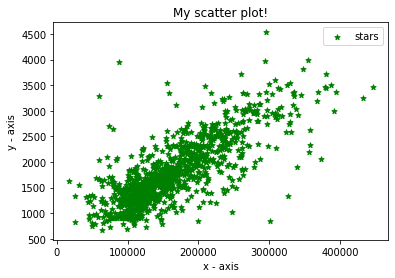

In [58]:
import matplotlib.pyplot as plt
# plotting points as a scatter plot
plt.scatter(X, Y, label= "stars", color= "green", 
            marker= "*", s=30)
# x-axis label
plt.xlabel('x - axis')
# frequency label
plt.ylabel('y - axis')
# plot title
plt.title('My scatter plot!')
# showing legend
plt.legend()
# function to show the plot
plt.show()

**Prediction**

In [60]:
# make a prediction with a ridge regression model on the dataset
from pandas import read_csv
from sklearn.linear_model import Ridge
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge(alpha=1.0)
# fit model
model.fit(X, y)
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 30.253


 **Display the most important variables of the model, relative to the calculated coefficients**

In [61]:
#Correlation between all the columns of DataFrame.
df2=hp.corr()
print(df2)

                Price  Living Area  Bathrooms  Bedrooms  Lot Size       Age  \
Price        1.000000     0.776396   0.670189  0.471074  0.155284 -0.363354   
Living Area  0.776396     1.000000   0.722649  0.664347  0.200180 -0.263168   
Bathrooms    0.670189     0.722649   1.000000  0.491798  0.100993 -0.443830   
Bedrooms     0.471074     0.664347   0.491798  1.000000  0.140682 -0.060598   
Lot Size     0.155284     0.200180   0.100993  0.140682  1.000000  0.015135   
Age         -0.363354    -0.263168  -0.443830 -0.060598  0.015135  1.000000   
Fireplace    0.460237     0.481436   0.444700  0.295873  0.052765 -0.248794   

             Fireplace  
Price         0.460237  
Living Area   0.481436  
Bathrooms     0.444700  
Bedrooms      0.295873  
Lot Size      0.052765  
Age          -0.248794  
Fireplace     1.000000  


**Graph Plot most important variables of the model, relative to the calculated coefficients**

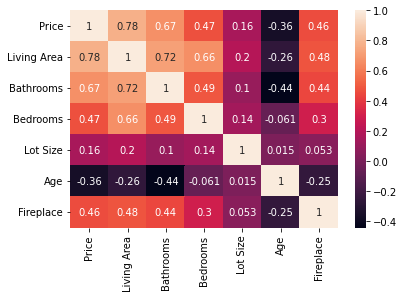

In [63]:
import seaborn as sns
ax = sns.heatmap(hp.corr(), annot=True)